In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import netCDF4 as nc
import seaborn as sns
import matplotlib.colors as mcolors
import glob
import os
import xarray as xr
import datetime
from salishsea_tools import viz_tools, tidetools, geo_tools, gsw_calls, wind_tools
import pickle
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib inline

In [13]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [104]:
aug0117 = pickle.load(open('/ocean/vdo/MIDOSS/01aug17.pkl', 'rb'))

In [105]:
tp_wind_speed, tp_wind_dir = wind_tools.wind_speed_dir(aug0117['tp_uwinds'], aug0117['tp_vwinds'])
sb_wind_speed, sb_wind_dir = wind_tools.wind_speed_dir(aug0117['sb_uwinds'], aug0117['sb_vwinds'])

In [106]:
tp_curr_speed, tp_curr_dir = wind_tools.wind_speed_dir(aug0117['tp_ucurr'], aug0117['tp_vcurr'])
sb_curr_speed, sb_curr_dir = wind_tools.wind_speed_dir(aug0117['sb_ucurr'], aug0117['sb_vcurr'])

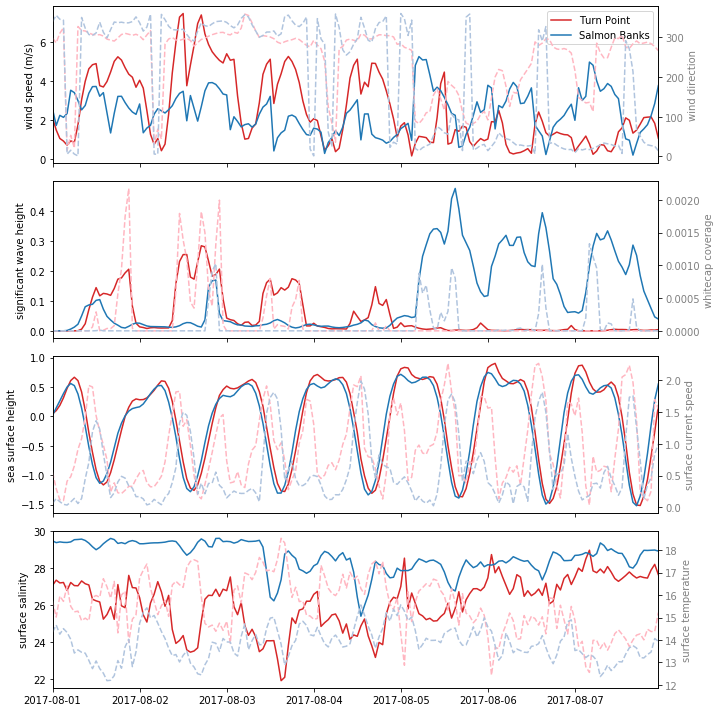

In [107]:
dates = [datetime.datetime(2017,8,1) + datetime.timedelta(hours = n) for n in range(168)]

fig, ax1 = plt.subplots(4,1, figsize = (10,10))

color = 'tab:red'

ax1[0].set_ylabel('wind speed (m/s)')
ax1[0].plot(dates, tp_wind_speed[:168], color=color, label = 'Turn Point')
ax1[0].plot(dates, sb_wind_speed[:168], color='tab:blue', label = 'Salmon Banks')
ax1[0].legend()

ax2 = ax1[0].twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('wind direction', color='grey')  # we already handled the x-label with ax1
ax2.plot(dates, tp_wind_dir[:168], '--', color='lightpink')
ax2.plot(dates, sb_wind_dir[:168],'--', color='lightsteelblue')
ax2.tick_params(axis='y', labelcolor='grey')

ax1[0].get_xaxis().set_ticklabels([])

ax1[1].set_ylabel('significant wave height')
ax1[1].plot(dates, aug0117['tp_swh'][:168], color=color, label = 'Turn Point')
ax1[1].plot(dates, aug0117['sb_swh'][:168], color='tab:blue', label = 'Salmon Banks')

ax3 = ax1[1].twinx()  # instantiate a second axes that shares the same x-axis

ax3.set_ylabel('whitecap coverage', color='grey')  # we already handled the x-label with ax1
ax3.plot(dates, aug0117['tp_wcc'][:168],'--', color='lightpink')
ax3.plot(dates, aug0117['sb_wcc'][:168], '--',color='lightsteelblue')
ax3.tick_params(axis='y', labelcolor='grey')

ax1[1].get_xaxis().set_ticklabels([])

ax1[2].set_ylabel('sea surface height')
ax1[2].plot(dates, aug0117['tp_ssh'][:168], color=color, label = 'Turn Point')
ax1[2].plot(dates, aug0117['sb_ssh'][:168], color='tab:blue', label = 'Salmon Banks')

ax4 = ax1[2].twinx()  # instantiate a second axes that shares the same x-axis

ax4.set_ylabel('surface current speed', color='grey')  # we already handled the x-label with ax1
ax4.plot(dates, tp_curr_speed[:168],'--', color='lightpink')
ax4.plot(dates, sb_curr_speed[:168], '--',color='lightsteelblue')
ax4.tick_params(axis='y', labelcolor='grey')

ax1[2].get_xaxis().set_ticklabels([])

ax1[3].set_ylabel('surface salinity')
ax1[3].plot(dates, aug0117['tp_sal'][:168], color=color, label = 'Turn Point')
ax1[3].plot(dates, aug0117['sb_sal'][:168], color='tab:blue', label = 'Salmon Banks')

ax5 = ax1[3].twinx()  # instantiate a second axes that shares the same x-axis

ax5.set_ylabel('surface temperature', color='grey')  # we already handled the x-label with ax1
ax5.plot(dates, aug0117['tp_tem'][:168], '--',color='lightpink')
ax5.plot(dates, aug0117['sb_tem'][:168], '--',color='lightsteelblue')
ax5.tick_params(axis='y', labelcolor='grey')

for a in ax1:
    a.set_xlim(dates[0], dates[-1])

fig.tight_layout()
fig.savefig('/home/vdo/Pictures/01aug17.png', dpi = 600)

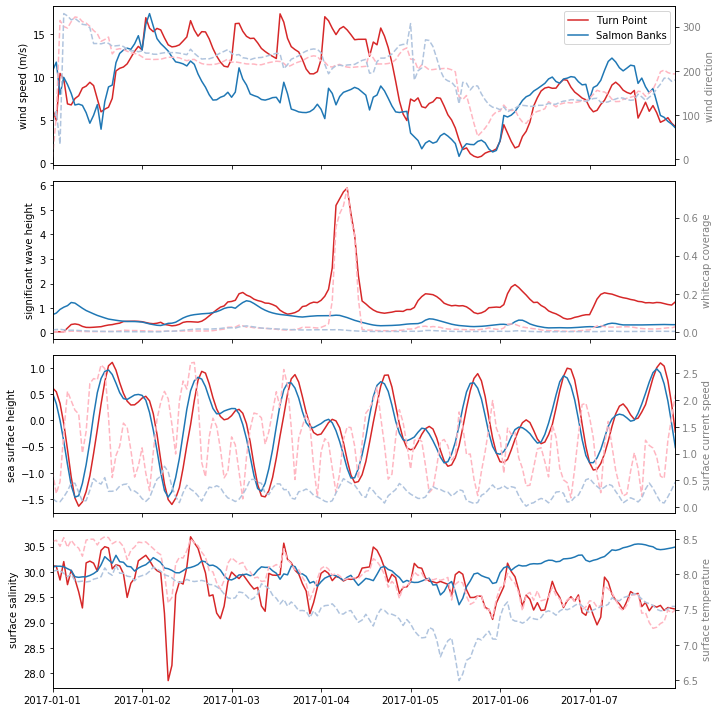

In [108]:
f = pickle.load(open('/ocean/vdo/MIDOSS/01jan17.pkl', 'rb'))

tp_wind_speed, tp_wind_dir = wind_tools.wind_speed_dir(f['tp_uwinds'], f['tp_vwinds'])
sb_wind_speed, sb_wind_dir = wind_tools.wind_speed_dir(f['sb_uwinds'], f['sb_vwinds'])

tp_curr_speed, tp_curr_dir = wind_tools.wind_speed_dir(f['tp_ucurr'], f['tp_vcurr'])
sb_curr_speed, sb_curr_dir = wind_tools.wind_speed_dir(f['sb_ucurr'], f['sb_vcurr'])

dates = [datetime.datetime(2017,1,1) + datetime.timedelta(hours = n) for n in range(168)]

fig, ax1 = plt.subplots(4,1, figsize = (10,10))

color = 'tab:red'

ax1[0].set_ylabel('wind speed (m/s)')
ax1[0].plot(dates, tp_wind_speed[:168], color=color, label = 'Turn Point')
ax1[0].plot(dates, sb_wind_speed[:168], color='tab:blue', label = 'Salmon Banks')
ax1[0].legend()

ax2 = ax1[0].twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('wind direction', color='grey')  # we already handled the x-label with ax1
ax2.plot(dates, tp_wind_dir[:168], '--', color='lightpink')
ax2.plot(dates, sb_wind_dir[:168],'--', color='lightsteelblue')
ax2.tick_params(axis='y', labelcolor='grey')

ax1[0].get_xaxis().set_ticklabels([])

ax1[1].set_ylabel('significant wave height')
ax1[1].plot(dates, f['tp_swh'][:168], color=color, label = 'Turn Point')
ax1[1].plot(dates, f['sb_swh'][:168], color='tab:blue', label = 'Salmon Banks')

ax3 = ax1[1].twinx()  # instantiate a second axes that shares the same x-axis

ax3.set_ylabel('whitecap coverage', color='grey')  # we already handled the x-label with ax1
ax3.plot(dates, f['tp_wcc'][:168],'--', color='lightpink')
ax3.plot(dates, f['sb_wcc'][:168], '--',color='lightsteelblue')
ax3.tick_params(axis='y', labelcolor='grey')

ax1[1].get_xaxis().set_ticklabels([])

ax1[2].set_ylabel('sea surface height')
ax1[2].plot(dates, f['tp_ssh'][:168], color=color, label = 'Turn Point')
ax1[2].plot(dates, f['sb_ssh'][:168], color='tab:blue', label = 'Salmon Banks')

ax4 = ax1[2].twinx()  # instantiate a second axes that shares the same x-axis

ax4.set_ylabel('surface current speed', color='grey')  # we already handled the x-label with ax1
ax4.plot(dates, tp_curr_speed[:168],'--', color='lightpink')
ax4.plot(dates, sb_curr_speed[:168], '--',color='lightsteelblue')
ax4.tick_params(axis='y', labelcolor='grey')

ax1[2].get_xaxis().set_ticklabels([])

ax1[3].set_ylabel('surface salinity')
ax1[3].plot(dates, f['tp_sal'][:168], color=color, label = 'Turn Point')
ax1[3].plot(dates, f['sb_sal'][:168], color='tab:blue', label = 'Salmon Banks')

ax5 = ax1[3].twinx()  # instantiate a second axes that shares the same x-axis

ax5.set_ylabel('surface temperature', color='grey')  # we already handled the x-label with ax1
ax5.plot(dates, f['tp_tem'][:168], '--',color='lightpink')
ax5.plot(dates, f['sb_tem'][:168], '--',color='lightsteelblue')
ax5.tick_params(axis='y', labelcolor='grey')

for a in ax1:
    a.set_xlim(dates[0], dates[-1])

fig.tight_layout()
fig.savefig('/home/vdo/Pictures/01jan17.png', dpi = 600)

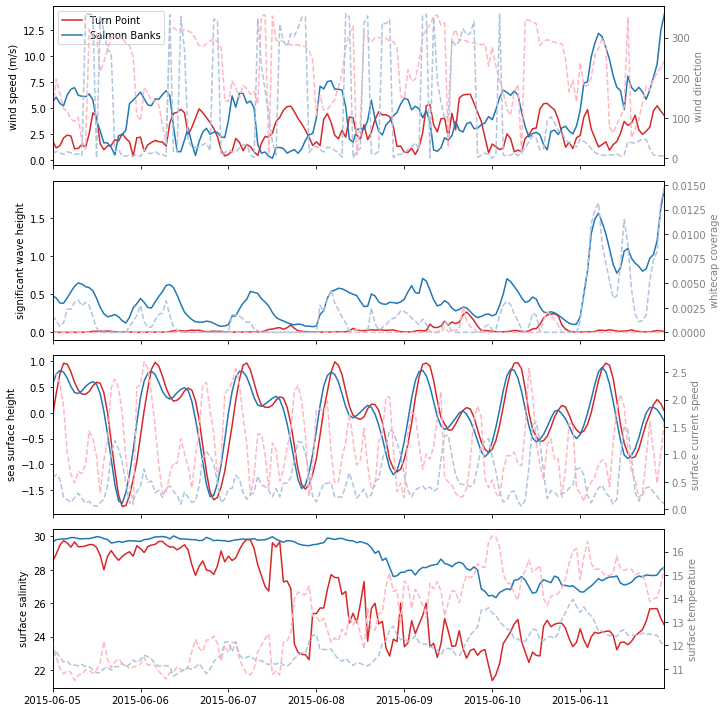

In [109]:
f = pickle.load(open('/ocean/vdo/MIDOSS/05jun15.pkl', 'rb'))

tp_wind_speed, tp_wind_dir = wind_tools.wind_speed_dir(f['tp_uwinds'], f['tp_vwinds'])
sb_wind_speed, sb_wind_dir = wind_tools.wind_speed_dir(f['sb_uwinds'], f['sb_vwinds'])

tp_curr_speed, tp_curr_dir = wind_tools.wind_speed_dir(f['tp_ucurr'], f['tp_vcurr'])
sb_curr_speed, sb_curr_dir = wind_tools.wind_speed_dir(f['sb_ucurr'], f['sb_vcurr'])

dates = [datetime.datetime(2015,6,5) + datetime.timedelta(hours = n) for n in range(168)]

fig, ax1 = plt.subplots(4,1, figsize = (10,10))

color = 'tab:red'

ax1[0].set_ylabel('wind speed (m/s)')
ax1[0].plot(dates, tp_wind_speed[:168], color=color, label = 'Turn Point')
ax1[0].plot(dates, sb_wind_speed[:168], color='tab:blue', label = 'Salmon Banks')
ax1[0].legend()

ax2 = ax1[0].twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('wind direction', color='grey')  # we already handled the x-label with ax1
ax2.plot(dates, tp_wind_dir[:168], '--', color='lightpink')
ax2.plot(dates, sb_wind_dir[:168],'--', color='lightsteelblue')
ax2.tick_params(axis='y', labelcolor='grey')

ax1[0].get_xaxis().set_ticklabels([])

ax1[1].set_ylabel('significant wave height')
ax1[1].plot(dates, f['tp_swh'][:168], color=color, label = 'Turn Point')
ax1[1].plot(dates, f['sb_swh'][:168], color='tab:blue', label = 'Salmon Banks')

ax3 = ax1[1].twinx()  # instantiate a second axes that shares the same x-axis

ax3.set_ylabel('whitecap coverage', color='grey')  # we already handled the x-label with ax1
ax3.plot(dates, f['tp_wcc'][:168],'--', color='lightpink')
ax3.plot(dates, f['sb_wcc'][:168], '--',color='lightsteelblue')
ax3.tick_params(axis='y', labelcolor='grey')

ax1[1].get_xaxis().set_ticklabels([])

ax1[2].set_ylabel('sea surface height')
ax1[2].plot(dates, f['tp_ssh'][:168], color=color, label = 'Turn Point')
ax1[2].plot(dates, f['sb_ssh'][:168], color='tab:blue', label = 'Salmon Banks')

ax4 = ax1[2].twinx()  # instantiate a second axes that shares the same x-axis

ax4.set_ylabel('surface current speed', color='grey')  # we already handled the x-label with ax1
ax4.plot(dates, tp_curr_speed[:168],'--', color='lightpink')
ax4.plot(dates, sb_curr_speed[:168], '--',color='lightsteelblue')
ax4.tick_params(axis='y', labelcolor='grey')

ax1[2].get_xaxis().set_ticklabels([])

ax1[3].set_ylabel('surface salinity')
ax1[3].plot(dates, f['tp_sal'][:168], color=color, label = 'Turn Point')
ax1[3].plot(dates, f['sb_sal'][:168], color='tab:blue', label = 'Salmon Banks')

ax5 = ax1[3].twinx()  # instantiate a second axes that shares the same x-axis

ax5.set_ylabel('surface temperature', color='grey')  # we already handled the x-label with ax1
ax5.plot(dates, f['tp_tem'][:168], '--',color='lightpink')
ax5.plot(dates, f['sb_tem'][:168], '--',color='lightsteelblue')
ax5.tick_params(axis='y', labelcolor='grey')

for a in ax1:
    a.set_xlim(dates[0], dates[-1])

fig.tight_layout()
fig.savefig('/home/vdo/Pictures/05jun15.png', dpi = 600)

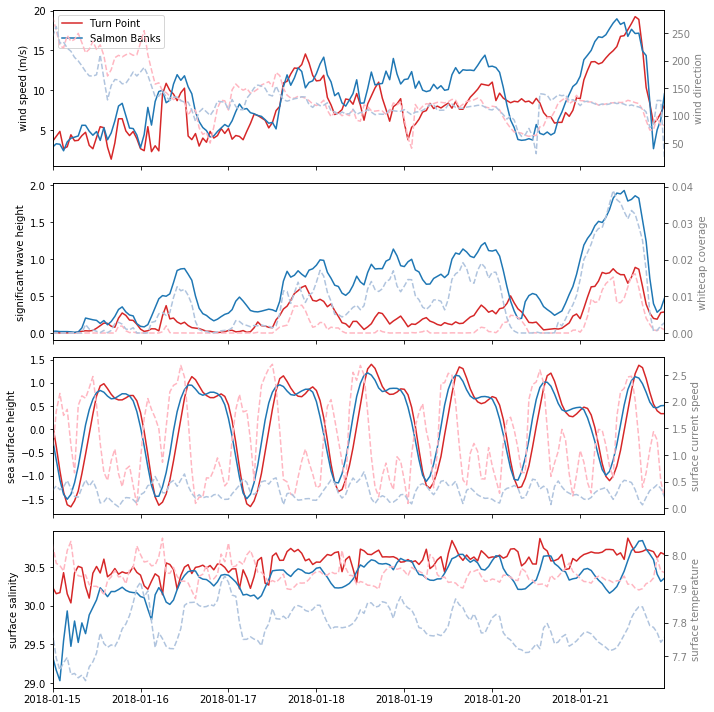

In [110]:
f = pickle.load(open('/ocean/vdo/MIDOSS/15jan18.pkl', 'rb'))

tp_wind_speed, tp_wind_dir = wind_tools.wind_speed_dir(f['tp_uwinds'], f['tp_vwinds'])
sb_wind_speed, sb_wind_dir = wind_tools.wind_speed_dir(f['sb_uwinds'], f['sb_vwinds'])

tp_curr_speed, tp_curr_dir = wind_tools.wind_speed_dir(f['tp_ucurr'], f['tp_vcurr'])
sb_curr_speed, sb_curr_dir = wind_tools.wind_speed_dir(f['sb_ucurr'], f['sb_vcurr'])

dates = [datetime.datetime(2018,1,15) + datetime.timedelta(hours = n) for n in range(168)]

fig, ax1 = plt.subplots(4,1, figsize = (10,10))

color = 'tab:red'

ax1[0].set_ylabel('wind speed (m/s)')
ax1[0].plot(dates, tp_wind_speed[:168], color=color, label = 'Turn Point')
ax1[0].plot(dates, sb_wind_speed[:168], color='tab:blue', label = 'Salmon Banks')
ax1[0].legend()

ax2 = ax1[0].twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('wind direction', color='grey')  # we already handled the x-label with ax1
ax2.plot(dates, tp_wind_dir[:168], '--', color='lightpink')
ax2.plot(dates, sb_wind_dir[:168],'--', color='lightsteelblue')
ax2.tick_params(axis='y', labelcolor='grey')

ax1[0].get_xaxis().set_ticklabels([])

ax1[1].set_ylabel('significant wave height')
ax1[1].plot(dates, f['tp_swh'][:168], color=color, label = 'Turn Point')
ax1[1].plot(dates, f['sb_swh'][:168], color='tab:blue', label = 'Salmon Banks')

ax3 = ax1[1].twinx()  # instantiate a second axes that shares the same x-axis

ax3.set_ylabel('whitecap coverage', color='grey')  # we already handled the x-label with ax1
ax3.plot(dates, f['tp_wcc'][:168],'--', color='lightpink')
ax3.plot(dates, f['sb_wcc'][:168], '--',color='lightsteelblue')
ax3.tick_params(axis='y', labelcolor='grey')

ax1[1].get_xaxis().set_ticklabels([])

ax1[2].set_ylabel('sea surface height')
ax1[2].plot(dates, f['tp_ssh'][:168], color=color, label = 'Turn Point')
ax1[2].plot(dates, f['sb_ssh'][:168], color='tab:blue', label = 'Salmon Banks')

ax4 = ax1[2].twinx()  # instantiate a second axes that shares the same x-axis

ax4.set_ylabel('surface current speed', color='grey')  # we already handled the x-label with ax1
ax4.plot(dates, tp_curr_speed[:168],'--', color='lightpink')
ax4.plot(dates, sb_curr_speed[:168], '--',color='lightsteelblue')
ax4.tick_params(axis='y', labelcolor='grey')

ax1[2].get_xaxis().set_ticklabels([])

ax1[3].set_ylabel('surface salinity')
ax1[3].plot(dates, f['tp_sal'][:168], color=color, label = 'Turn Point')
ax1[3].plot(dates, f['sb_sal'][:168], color='tab:blue', label = 'Salmon Banks')

ax5 = ax1[3].twinx()  # instantiate a second axes that shares the same x-axis

ax5.set_ylabel('surface temperature', color='grey')  # we already handled the x-label with ax1
ax5.plot(dates, f['tp_tem'][:168], '--',color='lightpink')
ax5.plot(dates, f['sb_tem'][:168], '--',color='lightsteelblue')
ax5.tick_params(axis='y', labelcolor='grey')

for a in ax1:
    a.set_xlim(dates[0], dates[-1])

fig.tight_layout()
fig.savefig('/home/vdo/Pictures/15jan18.png', dpi = 600)

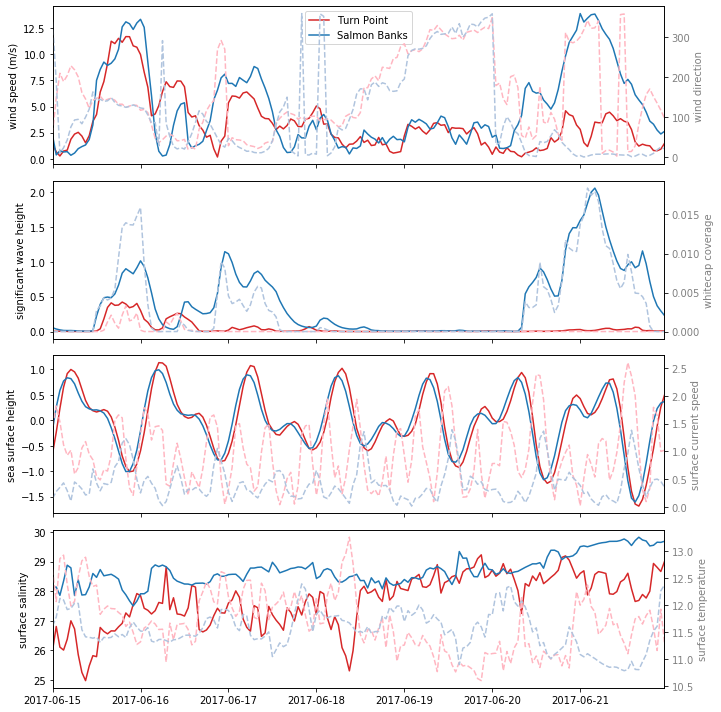

In [111]:
f = pickle.load(open('/ocean/vdo/MIDOSS/15jun17.pkl', 'rb'))

tp_wind_speed, tp_wind_dir = wind_tools.wind_speed_dir(f['tp_uwinds'], f['tp_vwinds'])
sb_wind_speed, sb_wind_dir = wind_tools.wind_speed_dir(f['sb_uwinds'], f['sb_vwinds'])

tp_curr_speed, tp_curr_dir = wind_tools.wind_speed_dir(f['tp_ucurr'], f['tp_vcurr'])
sb_curr_speed, sb_curr_dir = wind_tools.wind_speed_dir(f['sb_ucurr'], f['sb_vcurr'])

dates = [datetime.datetime(2017,6,15) + datetime.timedelta(hours = n) for n in range(168)]

fig, ax1 = plt.subplots(4,1, figsize = (10,10))

color = 'tab:red'

ax1[0].set_ylabel('wind speed (m/s)')
ax1[0].plot(dates, tp_wind_speed[:168], color=color, label = 'Turn Point')
ax1[0].plot(dates, sb_wind_speed[:168], color='tab:blue', label = 'Salmon Banks')
ax1[0].legend()

ax2 = ax1[0].twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('wind direction', color='grey')  # we already handled the x-label with ax1
ax2.plot(dates, tp_wind_dir[:168], '--', color='lightpink')
ax2.plot(dates, sb_wind_dir[:168],'--', color='lightsteelblue')
ax2.tick_params(axis='y', labelcolor='grey')

ax1[0].get_xaxis().set_ticklabels([])

ax1[1].set_ylabel('significant wave height')
ax1[1].plot(dates, f['tp_swh'][:168], color=color, label = 'Turn Point')
ax1[1].plot(dates, f['sb_swh'][:168], color='tab:blue', label = 'Salmon Banks')

ax3 = ax1[1].twinx()  # instantiate a second axes that shares the same x-axis

ax3.set_ylabel('whitecap coverage', color='grey')  # we already handled the x-label with ax1
ax3.plot(dates, f['tp_wcc'][:168],'--', color='lightpink')
ax3.plot(dates, f['sb_wcc'][:168], '--',color='lightsteelblue')
ax3.tick_params(axis='y', labelcolor='grey')

ax1[1].get_xaxis().set_ticklabels([])

ax1[2].set_ylabel('sea surface height')
ax1[2].plot(dates, f['tp_ssh'][:168], color=color, label = 'Turn Point')
ax1[2].plot(dates, f['sb_ssh'][:168], color='tab:blue', label = 'Salmon Banks')

ax4 = ax1[2].twinx()  # instantiate a second axes that shares the same x-axis

ax4.set_ylabel('surface current speed', color='grey')  # we already handled the x-label with ax1
ax4.plot(dates, tp_curr_speed[:168],'--', color='lightpink')
ax4.plot(dates, sb_curr_speed[:168], '--',color='lightsteelblue')
ax4.tick_params(axis='y', labelcolor='grey')

ax1[2].get_xaxis().set_ticklabels([])

ax1[3].set_ylabel('surface salinity')
ax1[3].plot(dates, f['tp_sal'][:168], color=color, label = 'Turn Point')
ax1[3].plot(dates, f['sb_sal'][:168], color='tab:blue', label = 'Salmon Banks')

ax5 = ax1[3].twinx()  # instantiate a second axes that shares the same x-axis

ax5.set_ylabel('surface temperature', color='grey')  # we already handled the x-label with ax1
ax5.plot(dates, f['tp_tem'][:168], '--',color='lightpink')
ax5.plot(dates, f['sb_tem'][:168], '--',color='lightsteelblue')
ax5.tick_params(axis='y', labelcolor='grey')

for a in ax1:
    a.set_xlim(dates[0], dates[-1])

fig.tight_layout()
fig.savefig('/home/vdo/Pictures/15jun17.png', dpi = 600)

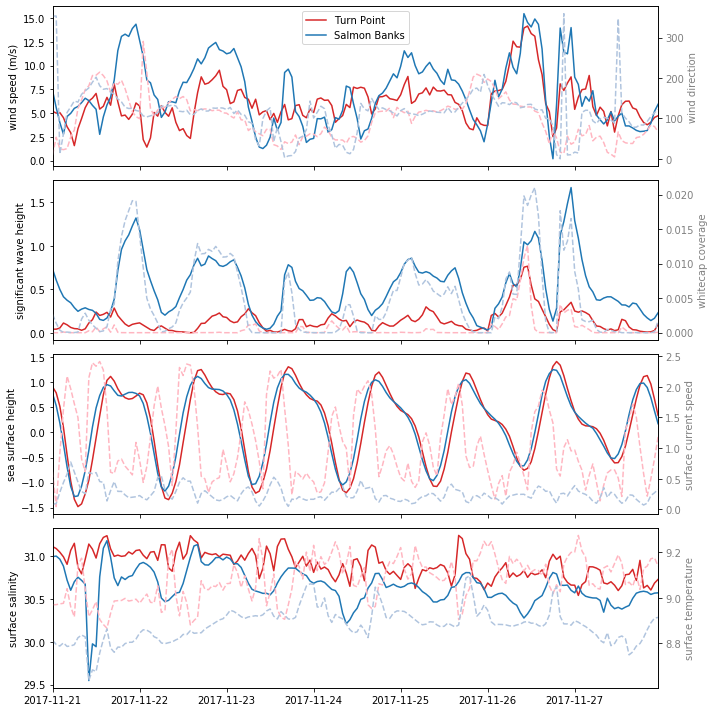

In [112]:
f = pickle.load(open('/ocean/vdo/MIDOSS/21nov17.pkl', 'rb'))

tp_wind_speed, tp_wind_dir = wind_tools.wind_speed_dir(f['tp_uwinds'], f['tp_vwinds'])
sb_wind_speed, sb_wind_dir = wind_tools.wind_speed_dir(f['sb_uwinds'], f['sb_vwinds'])

tp_curr_speed, tp_curr_dir = wind_tools.wind_speed_dir(f['tp_ucurr'], f['tp_vcurr'])
sb_curr_speed, sb_curr_dir = wind_tools.wind_speed_dir(f['sb_ucurr'], f['sb_vcurr'])

dates = [datetime.datetime(2017,11,21) + datetime.timedelta(hours = n) for n in range(168)]

fig, ax1 = plt.subplots(4,1, figsize = (10,10))

color = 'tab:red'

ax1[0].set_ylabel('wind speed (m/s)')
ax1[0].plot(dates, tp_wind_speed[:168], color=color, label = 'Turn Point')
ax1[0].plot(dates, sb_wind_speed[:168], color='tab:blue', label = 'Salmon Banks')
ax1[0].legend()

ax2 = ax1[0].twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('wind direction', color='grey')  # we already handled the x-label with ax1
ax2.plot(dates, tp_wind_dir[:168], '--', color='lightpink')
ax2.plot(dates, sb_wind_dir[:168],'--', color='lightsteelblue')
ax2.tick_params(axis='y', labelcolor='grey')

ax1[0].get_xaxis().set_ticklabels([])

ax1[1].set_ylabel('significant wave height')
ax1[1].plot(dates, f['tp_swh'][:168], color=color, label = 'Turn Point')
ax1[1].plot(dates, f['sb_swh'][:168], color='tab:blue', label = 'Salmon Banks')

ax3 = ax1[1].twinx()  # instantiate a second axes that shares the same x-axis

ax3.set_ylabel('whitecap coverage', color='grey')  # we already handled the x-label with ax1
ax3.plot(dates, f['tp_wcc'][:168],'--', color='lightpink')
ax3.plot(dates, f['sb_wcc'][:168], '--',color='lightsteelblue')
ax3.tick_params(axis='y', labelcolor='grey')

ax1[1].get_xaxis().set_ticklabels([])

ax1[2].set_ylabel('sea surface height')
ax1[2].plot(dates, f['tp_ssh'][:168], color=color, label = 'Turn Point')
ax1[2].plot(dates, f['sb_ssh'][:168], color='tab:blue', label = 'Salmon Banks')

ax4 = ax1[2].twinx()  # instantiate a second axes that shares the same x-axis

ax4.set_ylabel('surface current speed', color='grey')  # we already handled the x-label with ax1
ax4.plot(dates, tp_curr_speed[:168],'--', color='lightpink')
ax4.plot(dates, sb_curr_speed[:168], '--',color='lightsteelblue')
ax4.tick_params(axis='y', labelcolor='grey')

ax1[2].get_xaxis().set_ticklabels([])

ax1[3].set_ylabel('surface salinity')
ax1[3].plot(dates, f['tp_sal'][:168], color=color, label = 'Turn Point')
ax1[3].plot(dates, f['sb_sal'][:168], color='tab:blue', label = 'Salmon Banks')

ax5 = ax1[3].twinx()  # instantiate a second axes that shares the same x-axis

ax5.set_ylabel('surface temperature', color='grey')  # we already handled the x-label with ax1
ax5.plot(dates, f['tp_tem'][:168], '--',color='lightpink')
ax5.plot(dates, f['sb_tem'][:168], '--',color='lightsteelblue')
ax5.tick_params(axis='y', labelcolor='grey')

for a in ax1:
    a.set_xlim(dates[0], dates[-1])

fig.tight_layout()
fig.savefig('/home/vdo/Pictures/21nov17.png', dpi = 600)